<h1>Spacial density of Na and K in various traps</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from typing import Union

from quantum_statistics import (
    ParticleProps, 
    BEC, 
    FermiGas, 
    harmonic_trap,
    box_trap,
    box_2d_harmonic_1d_trap,
    ring_beam_trap,
    analyze_bec,
    analyze_fermi_gas,
    plot_condens_frac,
)

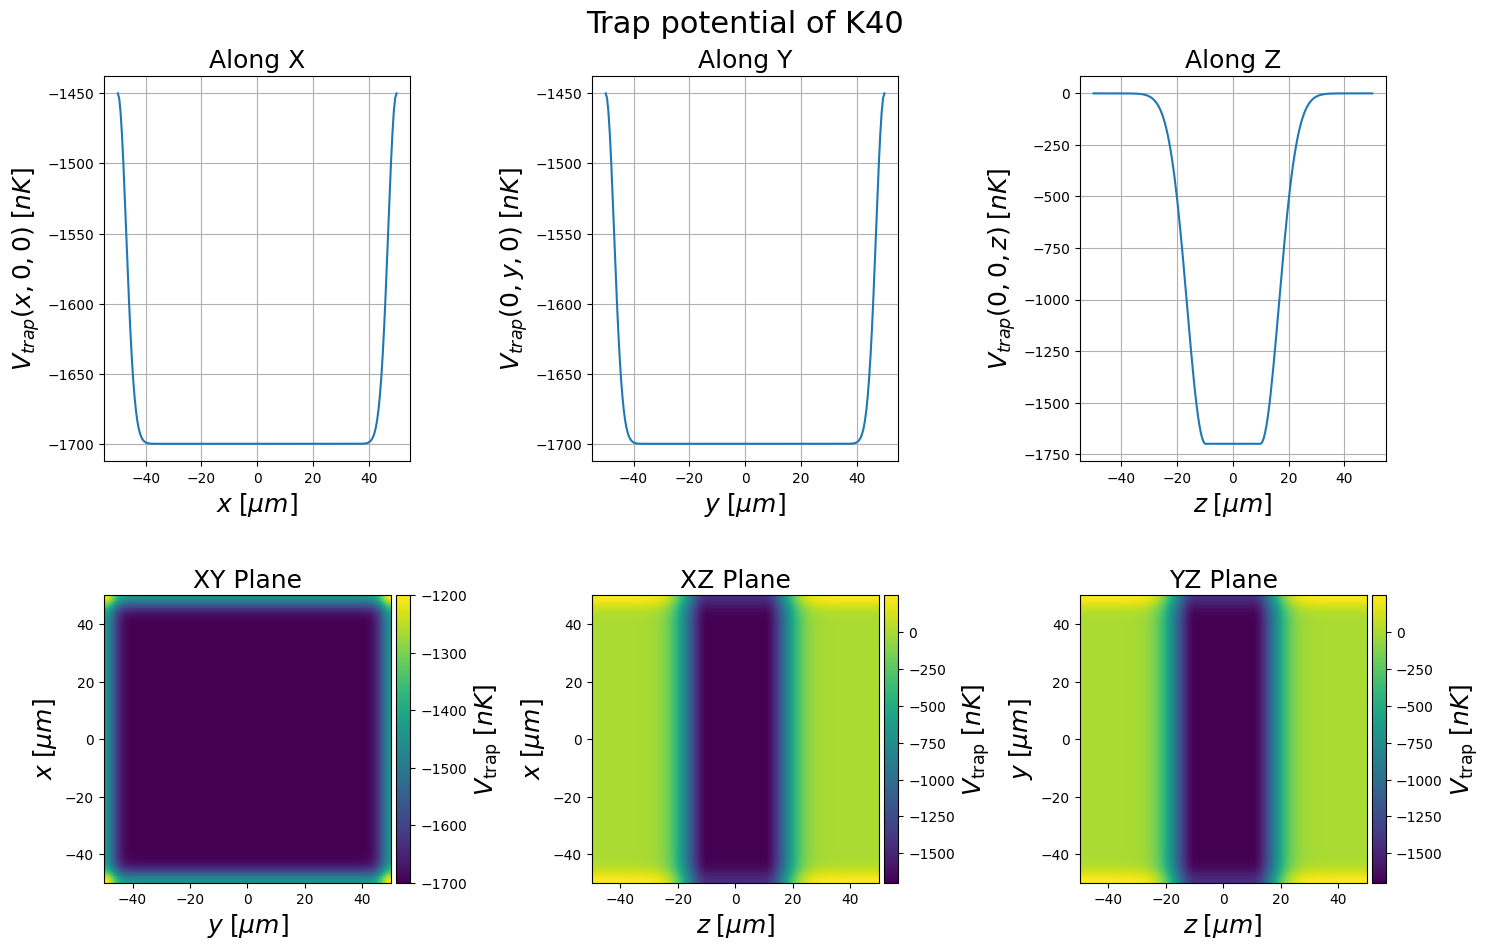

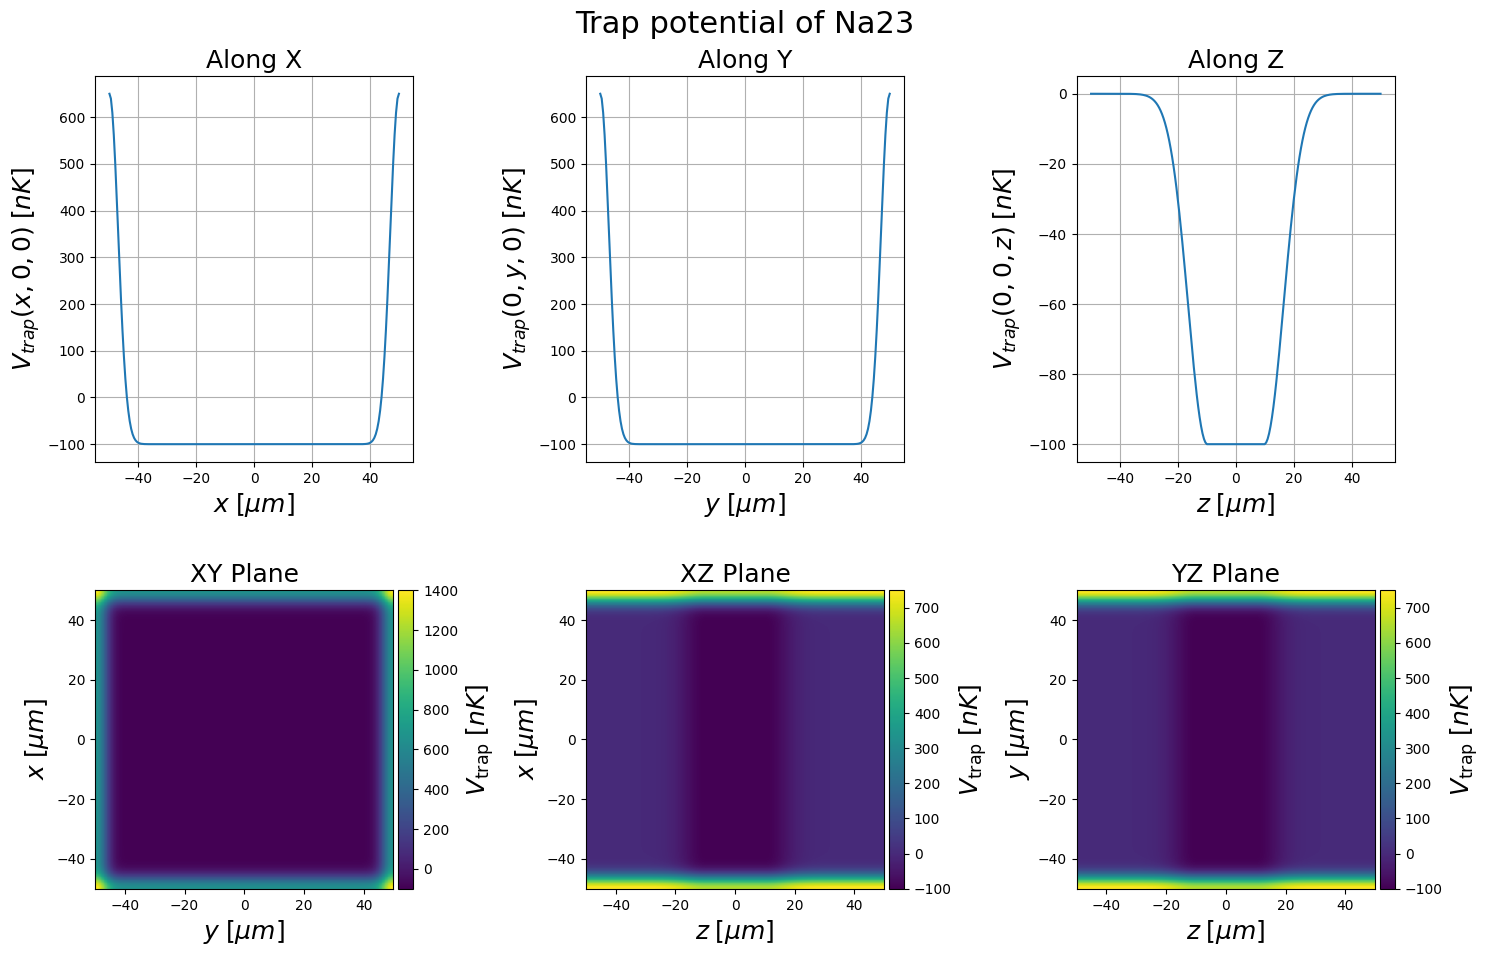

In [2]:
blue_trap_hight_K = 250*u.nK   # for Na: *3
red_trap_depth_K = 17*100*u.nK # for Na: /17

k40_harmonic = ParticleProps(
    name="K40",
    species="fermion",
    m=39.963999*u.u,
    N_particles=200000,
    T=45*u.nK,
    domain=(-50, 50)*u.um,
    #V_trap=harmonic_trap,
    #V_trap=box_trap,
    #V_trap=box_2d_harmonic_1d_trap,
    #trap_depth=17*100,
    #box_width=(100,100,100),
    #waist=50,
    V_trap=ring_beam_trap,
    flat_sizes=(100, 100, 20)*u.um,
    boundary_waists=(6, 6, 13)*u.um,
    blue_trap_hight=blue_trap_hight_K,
    red_trap_depth=red_trap_depth_K,
    inhomogenity=0,
)

na23_harmonic = ParticleProps(
    name="Na23",
    species="boson",
    m=22.989768*u.u,
    N_particles=200000,
    T=45*u.nK,
    a_s=2.75*u.nm,
    domain=(-50, 50)*u.um,
    #V_trap=harmonic_trap,
    #V_trap=box_trap,
    #V_trap=box_2d_harmonic_1d_trap,
    #trap_depth=100,
    #box_width=(100,100,100),
    #waist=50,
    V_trap=ring_beam_trap,
    flat_sizes=(100, 100, 20)*u.um,
    boundary_waists=(6, 6, 13)*u.um,
    blue_trap_hight=3*blue_trap_hight_K,
    red_trap_depth=red_trap_depth_K/17,
    inhomogenity=0,
)

k40_harmonic.plot_V_trap()
na23_harmonic.plot_V_trap()

In [3]:
fg = FermiGas(k40_harmonic)
fg.eval_density()

  5%|▍         | 49/1000 [02:01<39:20,  2.48s/it]

Convergence reached after 49 iterations.


In [4]:
bec = BEC(na23_harmonic)
bec.eval_density()

  3%|▎         | 33/1000 [01:39<48:42,  3.02s/it]  

Convergence reached after 33 iterations.


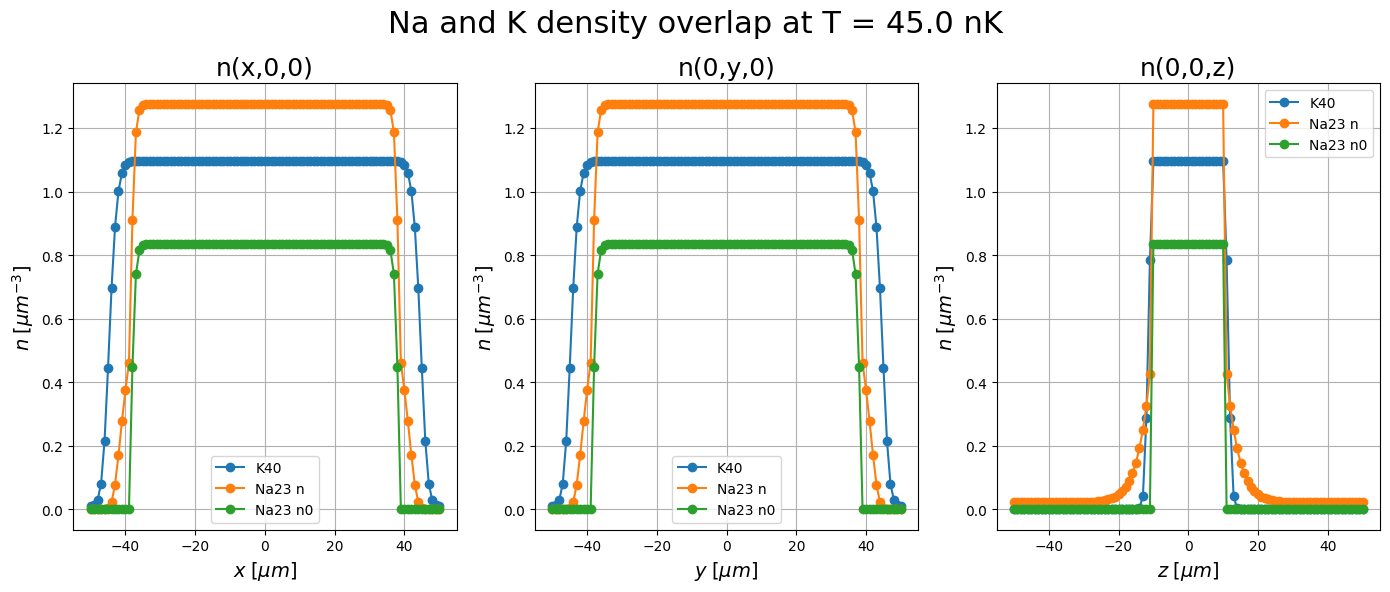

In [5]:
fig, axs = plt.subplots(ncols=3, figsize=(14,6))
fig.suptitle("Na and K density overlap at T = " + str(na23_harmonic.T), fontsize=22)

axs[0].plot(fg.x, fg.n_array[:,fg.num_grid_points[1]//2,fg.num_grid_points[2]//2], label="K40", marker="o")
axs[0].plot(bec.x, bec.n_array[:,bec.num_grid_points[1]//2,bec.num_grid_points[2]//2], label="Na23 n", marker="o")
axs[0].plot(bec.x, bec.n0_array[:,bec.num_grid_points[1]//2,bec.num_grid_points[2]//2], label="Na23 n0", marker="o")
axs[0].set_title(r"n(x,0,0)", fontsize=18)
axs[0].set_xlabel(r"$x \; [\mu m]$", fontsize=14)
axs[0].set_ylabel(r"$n \; [\mu m^{-3}]$", fontsize=14)
axs[0].grid(True)
axs[0].legend()

axs[1].plot(fg.y, fg.n_array[fg.num_grid_points[0]//2,:,fg.num_grid_points[2]//2], label="K40", marker="o")
axs[1].plot(bec.y, bec.n_array[bec.num_grid_points[0]//2,:,bec.num_grid_points[2]//2], label="Na23 n", marker="o")
axs[1].plot(bec.y, bec.n0_array[bec.num_grid_points[0]//2,:,bec.num_grid_points[2]//2], label="Na23 n0", marker="o")
axs[1].set_title(r"n(0,y,0)", fontsize=18)
axs[1].set_xlabel(r"$y \; [\mu m]$", fontsize=14)
axs[1].set_ylabel(r"$n \; [\mu m^{-3}]$", fontsize=14)
axs[1].grid(True)
axs[1].legend()

axs[2].plot(fg.z, fg.n_array[fg.num_grid_points[0]//2,fg.num_grid_points[1]//2, :], label="K40", marker="o")
axs[2].plot(bec.z, bec.n_array[bec.num_grid_points[0]//2,bec.num_grid_points[1]//2, :], label="Na23 n", marker="o")
axs[2].plot(bec.z, bec.n0_array[bec.num_grid_points[0]//2,bec.num_grid_points[1]//2, :], label="Na23 n0", marker="o")
axs[2].set_title(r"n(0,0,z)", fontsize=18)
axs[2].set_xlabel(r"$z \; [\mu m]$", fontsize=14)
axs[2].set_ylabel(r"$n \; [\mu m^{-3}]$", fontsize=14)
axs[2].grid(True)
axs[2].legend()

fig.tight_layout()

In [6]:
bec.condensate_fraction

<Quantity 0.50413763>

In [7]:
na23_harmonicT0 = na23_harmonic.copy()
na23_harmonicT0.T = 0*u.nK
k40_harmonicT0 = k40_harmonic.copy()
k40_harmonicT0.T = 0*u.nK

In [8]:
fgT0 = FermiGas(k40_harmonicT0, num_grid_points=101)
fgT0.eval_density(num_q_values=101)

  0%|          | 0/1000 [00:00<?, ?it/s]

  5%|▍         | 49/1000 [00:01<00:38, 24.63it/s]

Convergence reached after 49 iterations.


In [9]:
becT0 = BEC(na23_harmonicT0, num_grid_points=101)
becT0.eval_density(num_q_values=101)

  4%|▍         | 38/1000 [00:01<00:29, 32.14it/s]

Convergence reached after 38 iterations.


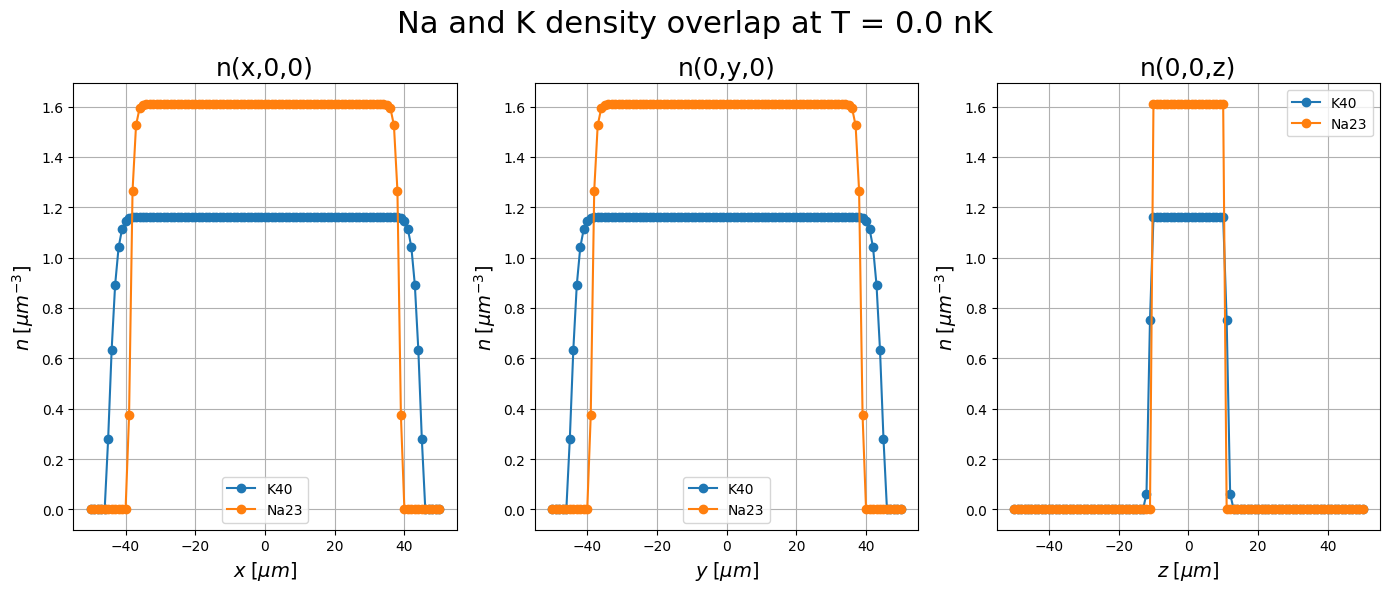

In [10]:
fig, axs = plt.subplots(ncols=3, figsize=(14,6))
fig.suptitle("Na and K density overlap at T = " + str(na23_harmonicT0.T), fontsize=22)

axs[0].plot(fgT0.x, fgT0.n_array[:,fgT0.num_grid_points[1]//2,fgT0.num_grid_points[2]//2], label="K40", marker="o")
axs[0].plot(becT0.x, becT0.n_array[:,bec.num_grid_points[1]//2,bec.num_grid_points[2]//2], label="Na23", marker="o")
axs[0].set_title(r"n(x,0,0)", fontsize=18)
axs[0].set_xlabel(r"$x \; [\mu m]$", fontsize=14)
axs[0].set_ylabel(r"$n \; [\mu m^{-3}]$", fontsize=14)
axs[0].grid(True)
axs[0].legend()

axs[1].plot(fgT0.y, fgT0.n_array[fgT0.num_grid_points[0]//2,:,fgT0.num_grid_points[2]//2], label="K40", marker="o")
axs[1].plot(becT0.y, becT0.n_array[bec.num_grid_points[0]//2,:,bec.num_grid_points[2]//2], label="Na23", marker="o")
axs[1].set_title(r"n(0,y,0)", fontsize=18)
axs[1].set_xlabel(r"$y \; [\mu m]$", fontsize=14)
axs[1].set_ylabel(r"$n \; [\mu m^{-3}]$", fontsize=14)
axs[1].grid(True)
axs[1].legend()

axs[2].plot(fgT0.z, fgT0.n_array[fgT0.num_grid_points[0]//2,fgT0.num_grid_points[1]//2, :], label="K40", marker="o")
axs[2].plot(becT0.z, becT0.n_array[bec.num_grid_points[0]//2,bec.num_grid_points[1]//2, :], label="Na23", marker="o")
axs[2].set_title(r"n(0,0,z)", fontsize=18)
axs[2].set_xlabel(r"$z \; [\mu m]$", fontsize=14)
axs[2].set_ylabel(r"$n \; [\mu m^{-3}]$", fontsize=14)
axs[2].grid(True)
axs[2].legend()

fig.tight_layout()

  0%|          | 0/1000 [00:00<?, ?it/s]

  4%|▍         | 38/1000 [00:01<00:41, 22.91it/s]


Convergence reached after 38 iterations.


  3%|▎         | 32/1000 [01:52<56:39,  3.51s/it] 


Convergence reached after 32 iterations.


  3%|▎         | 32/1000 [01:52<56:57,  3.53s/it]


Convergence reached after 32 iterations.


  4%|▍         | 38/1000 [02:16<57:30,  3.59s/it]  


Convergence reached after 38 iterations.


  3%|▎         | 31/1000 [01:56<1:00:41,  3.76s/it]

Convergence reached after 31 iterations.



/home/lelo/Dokumente/lightmat/quantum_statistics/analyze_gas.py:217: RuntimeWarning: divide by zero encountered in power
  return 1 - (T / T_c)**alpha


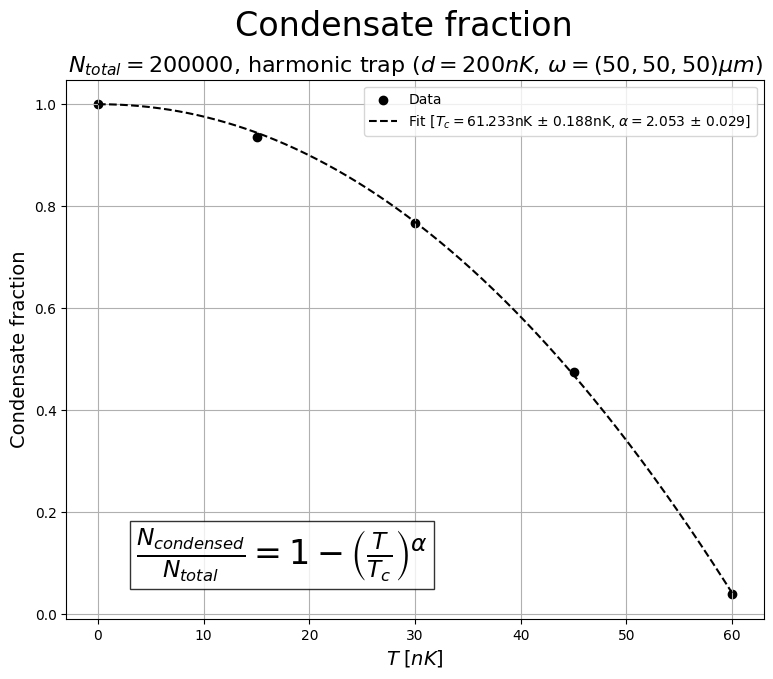

In [ ]:
na23_harmonic = ParticleProps(
    name="Na23",
    species="boson",
    m=22.989768*u.u,
    N_particles=200000,
    T=40*u.nK,
    a_s=2.75*u.nm,
    domain=(-50, 50)*u.um,
    #V_trap=harmonic_trap,
    #V_trap=box_trap,
    #V_trap=box_2d_harmonic_1d_trap,
    #trap_depth=100,
    #box_width=(100,100,100),
    #waist=50,
    V_trap=ring_beam_trap,
    flat_sizes=(100, 100, 20)*u.um,
    boundary_waists=(6, 6, 13)*u.um,
    blue_trap_hight=3*100*u.nK,
    red_trap_depth=100*u.nK,
    inhomogenity=0,
)

Ts = np.linspace(0, 60, 5)*u.nK
becs = analyze_bec(Ts, na23_harmonic)
plot_condens_frac(Ts, becs)